In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from sklearn.decomposition import TruncatedSVD


In [2]:
path = "data/experiments/master_ml/dataset_ml.csv"

df = pd.read_csv(path)

In [3]:
df.head()

,journal,processed_text
0,1 Applied Ergonomics,enhanced threat detection three dimensions ima...
1,1 Applied Ergonomics,aviation neurophysiology systematic review pap...
2,1 Applied Ergonomics,urban air mobility infrastructure design using...
3,1 Applied Ergonomics,cleaning st century musculoskeletal disorders ...
4,1 Applied Ergonomics,determination improved climatic conditions the...


Class Assignment:
ID 0: 1 Applied Ergonomics
ID 1: 3 Expert Systems with Applications
ID 2: 5 Pattern Recognition
ID 3: 6 Robotics and Autonomous Systems


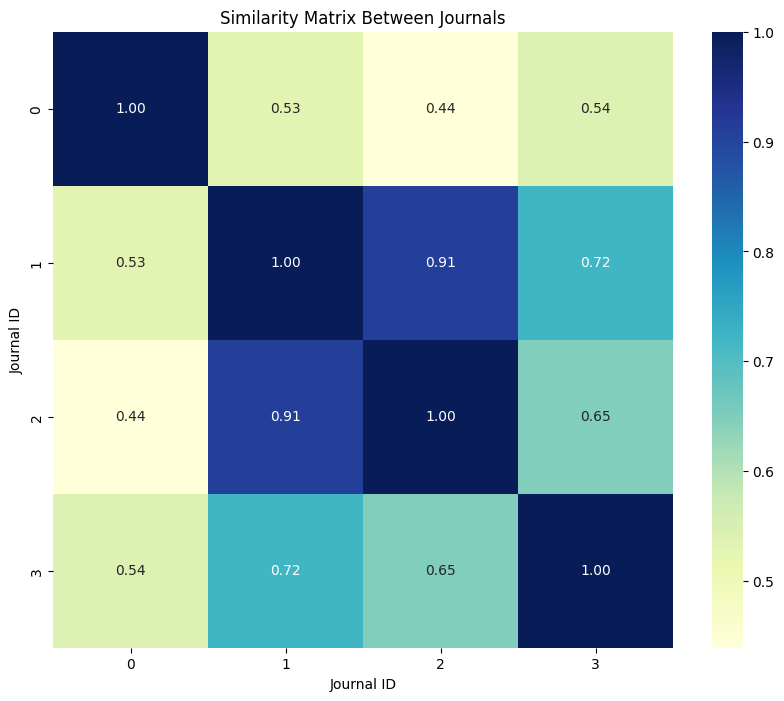


Average similarity between classes: 0.631


In [5]:
journals_grouped = df.groupby('journal')['processed_text'].apply(lambda texts: " ".join(texts)).reset_index()

vectorizer = TfidfVectorizer(stop_words='english', max_features=None, min_df=2) 
tfidf_matrix = vectorizer.fit_transform(journals_grouped['processed_text'])

cosine_sim_matrix = cosine_similarity(tfidf_matrix)

journals_list = journals_grouped['journal'].tolist()
mapping = {i: journal for i, journal in enumerate(journals_list)}
indices_numericos = list(mapping.keys())

sim_df = pd.DataFrame(cosine_sim_matrix, index=indices_numericos, columns=indices_numericos)

path_to_save = "data/experiments/"
plt.figure(figsize=(10, 8))
ax = sns.heatmap(sim_df, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Similarity Matrix Between Journals')
plt.ylabel('Journal ID')
plt.xlabel('Journal ID')
print("Class Assignment:")
for num, name in mapping.items():
    print(f"ID {num}: {name}")
plt.savefig(path_to_save + "cosine_similarity_heatmap.png", dpi=300)
plt.show()

mean_sim = (cosine_sim_matrix.sum() - len(journals_list)) / (len(journals_list)**2 - len(journals_list))
print(f"\nAverage similarity between classes: {mean_sim:.3f}")

In [6]:
svd = TruncatedSVD(n_components=3000)
svd.fit(tfidf_matrix)

print(f"Variance explained with 3000 features: {svd.explained_variance_ratio_.sum():.2%}")

Variance explained with 3000 features: 100.00%


In [7]:
all_words = " ".join(df['processed_text']).split()
word_counts = Counter(all_words)
total_unique_words = len(word_counts)
limit = 3000
top_count = sum([count for word, count in word_counts.most_common(limit)])
total_count = sum(word_counts.values())

coverage = (top_count / total_count) * 100
print(f"Your top {limit} words cover {coverage:.2f}% of the total content.")
print(f"Total words in dataset: {total_unique_words}")

Your top 3000 words cover 83.73% of the total content.
Total words in dataset: 65644
